# Saahi Arumilli's Work For CS 418 Project
### Accumulated from throughout the semester

In [1]:
 %pip install seaborn

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import sklearn
import scipy
from scipy import stats
import string
import re # helps you filter urls
from IPython.display import display, Latex, Markdown

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd "/content/drive/MyDrive/CS 418 - Project"
!pwd

/content/drive/MyDrive/CS 418 - Project
/content/drive/MyDrive/CS 418 - Project


In [5]:

chi_data = pd.read_csv('Chicago_City_Employment_Data_20240223.csv')
over2020_data = pd.read_csv('Employee_Overtime_and_Supplemental_Earnings_2020_20240223.csv')

# https://data.cityofchicago.org/Administration-Finance/Current-Employee-Names-Salaries-and-Position-Title/xzkq-xp2w/data_preview
# https://data.cityofchicago.org/d/njrn-3hws/visualization
# https://data.cityofchicago.org/d/2vpk-jv3c/visualization

#chi_data.head()
over2020_data.head()
print((over2020_data['DEPARTMENT NAME'].unique())) # 36 departments are shown in this data

['CHICAGO POLICE DEPARTMENT' 'CHICAGO DEPARTMENT OF TRANSPORTATION'
 'DEPARTMENT OF AVIATION' 'CHICAGO FIRE DEPARTMENT'
 'DEPARTMENT OF WATER MANAGEMENT'
 'DEPARTMENT OF ASSETS, INFORMATION, AND SERVICES'
 'DEPARTMENT OF STREETS AND SANITATION' 'DEPARTMENT OF PUBLIC HEALTH'
 'OFFICE OF EMERGENCY MANAGEMENT AND COMMUNICATIONS'
 'CHICAGO PUBLIC LIBRARY' 'FINANCE GENERAL'
 'CHICAGO ANIMAL CARE AND CONTROL' 'CITY CLERK'
 'BOARD OF ELECTION COMMISSIONERS' 'DEPARTMENT OF FINANCE'
 'DEPARTMENT OF BUILDINGS' 'CIVILIAN OFFICE OF POLICE ACCOUNTABILITY'
 'OFFICE OF PUBLIC SAFETY ADMINISTRATION' 'OFFICE OF INSPECTOR GENERAL'
 'DEPARTMENT OF FAMILY AND SUPPORT SERVICES'
 "MAYOR'S OFFICE FOR PEOPLE WITH DISABILITIES"
 'DEPARTMENT OF ADMINISTRATIVE HEARINGS'
 'DEPARTMENT OF BUSINESS AFFAIRS AND CONSUMER PROTECTION']


In [6]:
over2022_data = pd.read_csv('Employee_Overtime_and_Supplemental_Earnings_2022_20240223.csv')


over2022_data['DEPARTMENT NAME'] = over2022_data['DEPARTMENT NAME'].str.upper()
over2022_data.head()

,DEPARTMENT NAME,NAME,TITLE,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,TOTAL
0,CHICAGO POLICE DEPARTMENT,"AARON, JEFFERY M",SERGEANT,1812.00,4110.15,0.00,928.10,1645.40,4164.24,5249.59,2209.76,3248.96,707.12,0.00,2472.82,26548.14
1,CHICAGO POLICE DEPARTMENT,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),0.00,0.00,159.80,1358.32,0.00,2173.63,3452.05,859.59,1292.12,639.21,639.21,0.00,10573.93
2,CHICAGO DEPARTMENT OF TRANSPORTATION,"ABARCA, EMMANUEL",CONCRETE LABORER,4796.55,5450.63,1595.03,1170.45,1101.60,1101.60,0.00,1112.40,561.60,0.00,0.00,0.00,16889.86
3,CHICAGO POLICE DEPARTMENT,"ABARCA, FRANCES J",POLICE OFFICER,0.00,0.00,0.00,500.37,500.37,2151.46,1063.28,0.00,0.00,1952.01,360.90,1673.25,8201.64
4,DEPARTMENT OF AVIATION,"ABBATACOLA, ROBERT J",ELECTRICAL MECHANIC,0.00,114.75,0.00,0.00,0.00,204.00,612.00,0.00,1224.00,0.00,612.00,0.00,2766.75


<Figure size 1000x600 with 0 Axes>

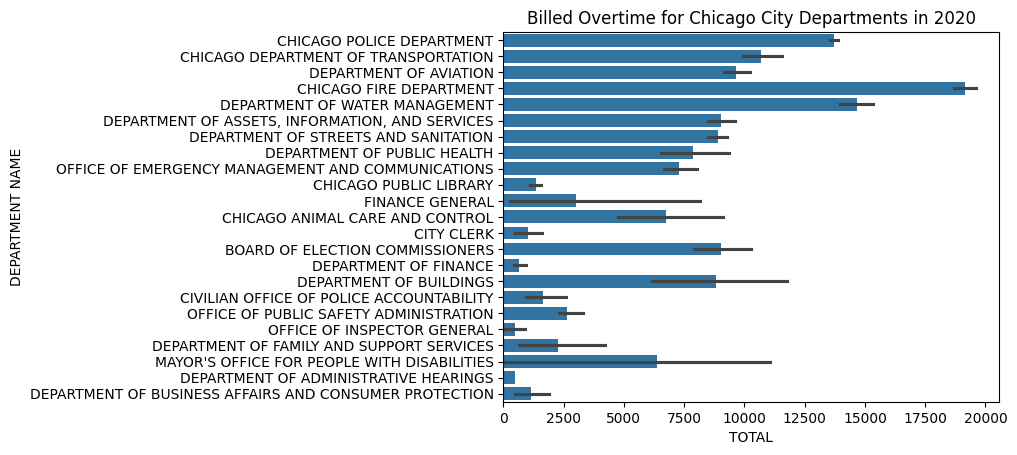

In [7]:
# find all paramedics and see the total amount of overtime this department made
over2020_data.loc[over2020_data['TITLE'] == 'PARAMEDIC','TOTAL']

plt.figure(figsize=(10, 6))
subPlot = plt.subplots()

subPlot = sns.barplot(x='TOTAL', y='DEPARTMENT NAME', data=over2020_data)
#subPlot = sns.barplot(x='TOTAL', y='DEPARTMENT NAME', data= over2022_data)

# sns.barplot(x='TOTAL', y='DEPARTMENT NAME', data=over2020_data)
# sns.barplot(x='TOTAL', y='DEPARTMENT NAME', data= over2022_data)
#subPlot = sns.barplot(x='TOTAL', y='DEPARTMENT NAME', data= over2022_data)
plt.title("Billed Overtime for Chicago City Departments in 2020")
plt.show()

<Figure size 1000x600 with 0 Axes>

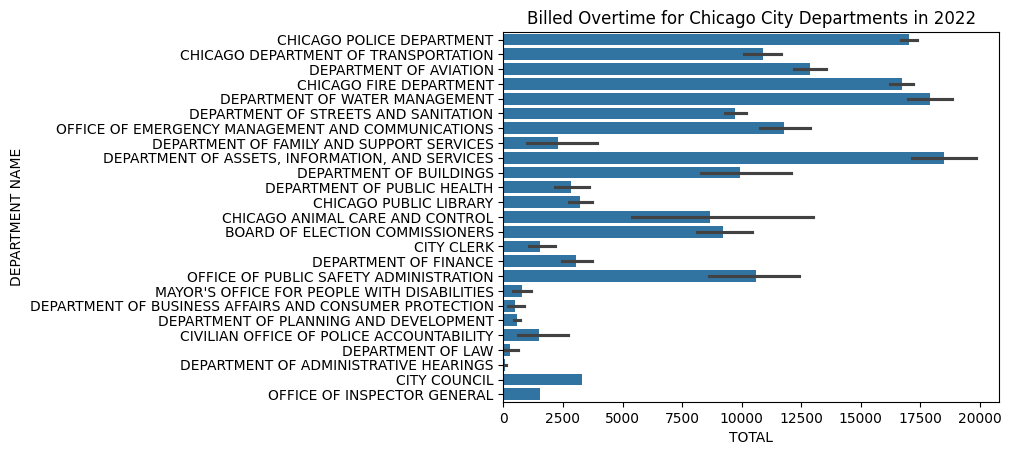

In [8]:
# over2022_data.loc[over2022_data['TITLE'] == 'PARAMEDIC','TOTAL']
plt.figure(figsize=(10, 6))
subPlot = plt.subplots()

subPlot = sns.barplot(x='TOTAL', y='DEPARTMENT NAME', data= over2022_data)
plt.title("Billed Overtime for Chicago City Departments in 2022")
plt.show()

27624
26901
54525


In [9]:
# Renaming total columns when data is merged, we can differntiate

over2022_data.rename(columns={'TOTAL': 'Averge Rate 2022'}, inplace=True)
over2020_data.rename(columns={'TOTAL': 'Average Rate 2020'}, inplace=True)
#over2022_data.columns
over2020_data.columns

Index(['DEPARTMENT NAME', 'NAME', 'TITLE', 'JANUARY', 'FEBRUARY', 'MARCH',
       'APRIL', 'MAY', 'JUNE', 'JULY', 'AUGUST', 'SEPTEMBER', 'OCTOBER',
       'NOVEMBER', 'DECEMBER', 'Average Rate 2020'],
      dtype='object')

Text(0.5, 1.0, 'Average Billed Overtime for Chicago City Departments in 2020 & 2022')

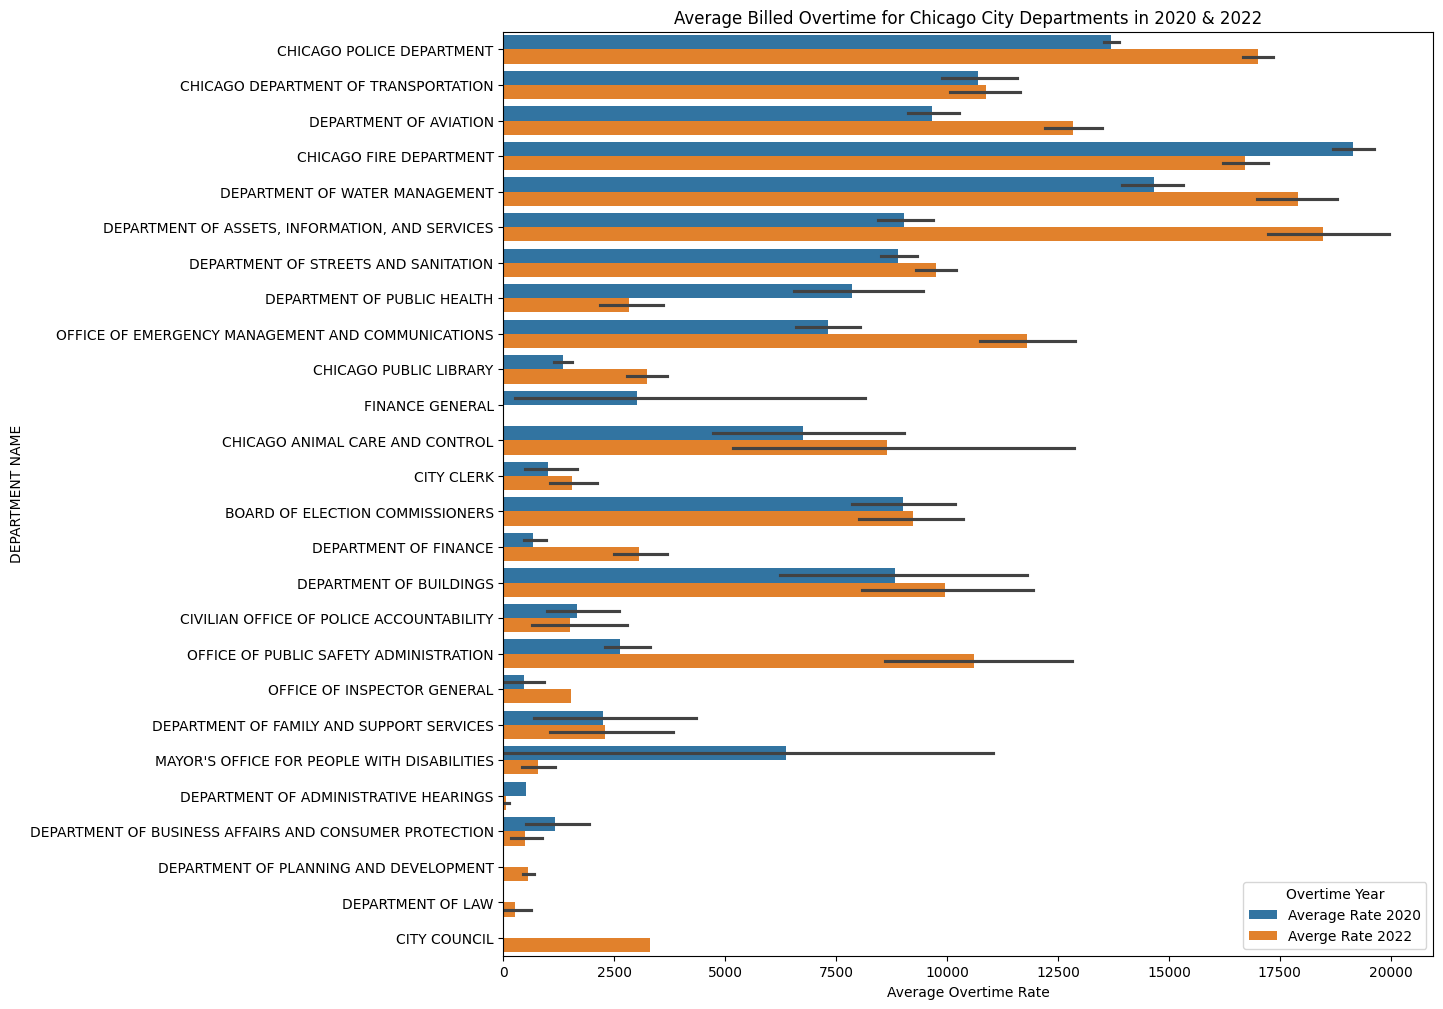

In [11]:
# Data Concatenation
plt.figure(figsize=(12, 12))
otFrame = [over2020_data, over2022_data]

resultFrame = pd.concat(otFrame)
resultFrame.head()

# print(len(over2020_data.axes[0]))
# print(len(over2022_data.axes[0]))
# print(len(resultFrame.axes[0]))
resultFrame.columns

# Melt the data
melted_data = pd.melt(resultFrame, id_vars=['DEPARTMENT NAME'], value_vars=['Average Rate 2020', 'Averge Rate 2022'], var_name='Overtime Year', value_name='Average Overtime Rate')


#sns.barplot(x='DEPARTMENT NAME', y='Average Overtime', hue='Overtime Year' , data=melted_data)
sns.barplot(x='Average Overtime Rate', y='DEPARTMENT NAME', hue='Overtime Year' , data=melted_data)
plt.title("Average Billed Overtime for Chicago City Departments in 2020 & 2022")
#sns.barplot(x='Total 2022', y='DEPARTMENT NAME', data=melted_data)


27624
26901
54525


Text(0.5, 1.0, 'Average Billed Overtime for Chicago City Departments in 2020 & 2022')

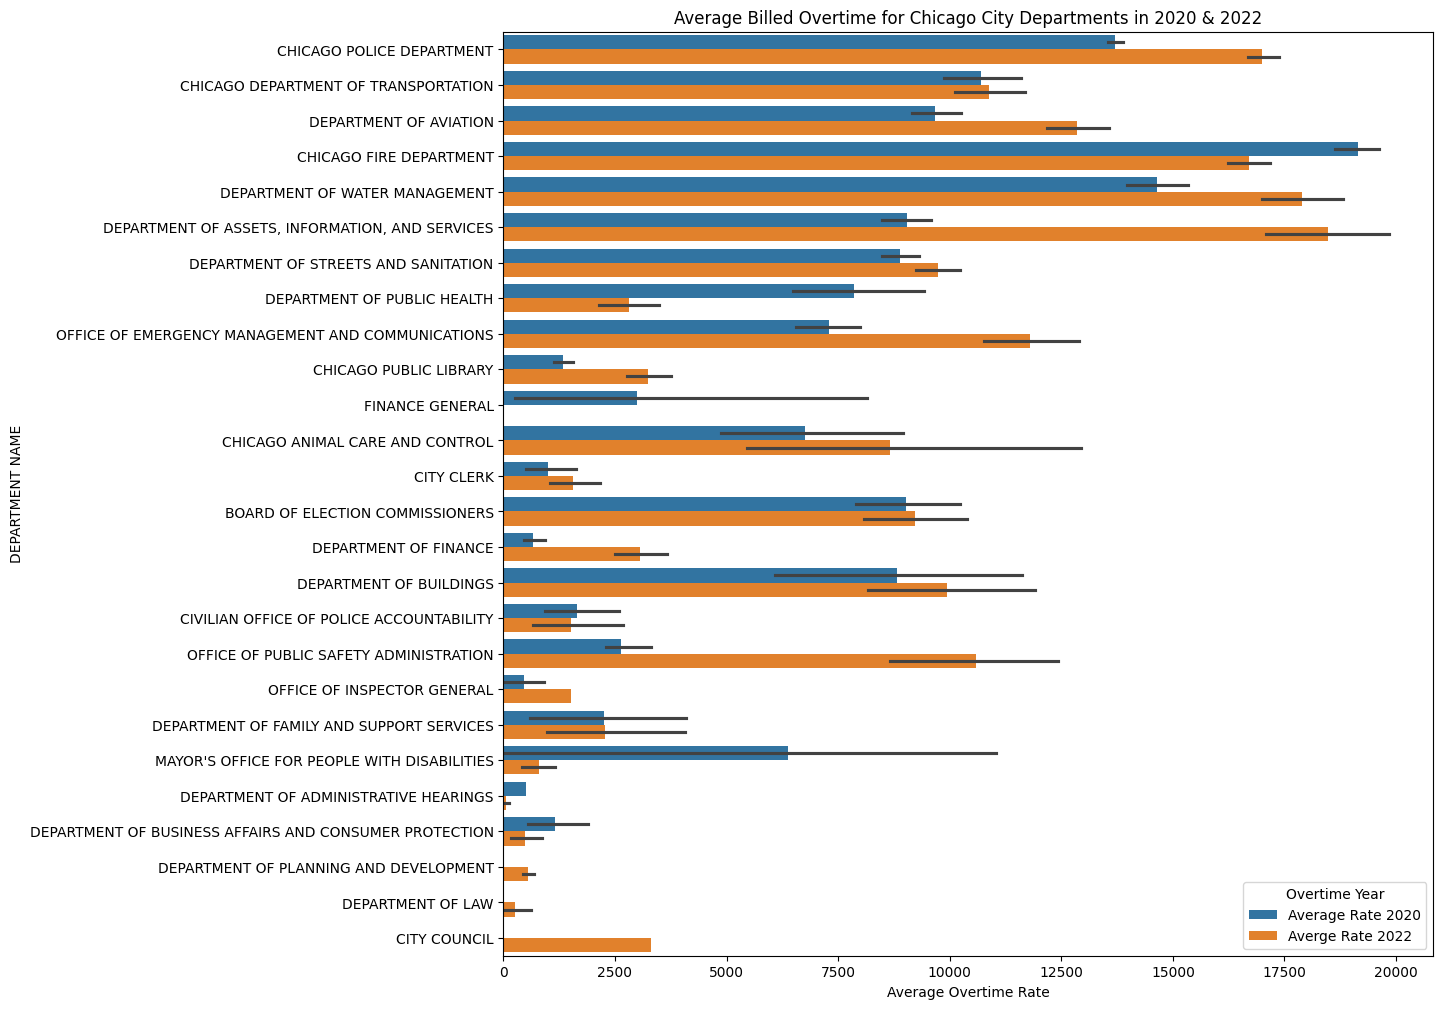

In [12]:
over2022_data.rename(columns={'TOTAL': 'Averge Rate 2022'}, inplace=True)
over2020_data.rename(columns={'TOTAL': 'Average Rate 2020'}, inplace=True)

# Data Concatenation
plt.figure(figsize=(12, 12))
otFrame = [over2020_data, over2022_data]

resultFrame = pd.concat(otFrame)
resultFrame.head()

print(len(over2020_data.axes[0]))
print(len(over2022_data.axes[0]))
print(len(resultFrame.axes[0]))
resultFrame.columns

# Melt the data
melted_data = pd.melt(resultFrame, id_vars=['DEPARTMENT NAME'], value_vars=['Average Rate 2020', 'Averge Rate 2022'], var_name='Overtime Year', value_name='Average Overtime Rate')


#sns.barplot(x='DEPARTMENT NAME', y='Average Overtime', hue='Overtime Year' , data=melted_data)
sns.barplot(x='Average Overtime Rate', y='DEPARTMENT NAME', hue='Overtime Year' , data=melted_data)
plt.title("Average Billed Overtime for Chicago City Departments in 2020 & 2022")
#sns.barplot(x='Total 2022', y='DEPARTMENT NAME', data=melted_data)


Seeing which job titles make up the sectors who billed more overtime

In [13]:
fireFrame = over2020_data[over2020_data['DEPARTMENT NAME']== "CHICAGO FIRE DEPARTMENT"]
print(fireFrame['TITLE'].unique())

['FIRE ENGINEER-EMT' 'PARAMEDIC'
 'FIREFIGHTER (PER ARBITRATORS AWARD)-PARAMEDIC' 'FIREFIGHTER/PARAMEDIC'
 'FIREFIGHTER-EMT' 'PARAMEDIC I/C' 'FIREFIGHTER-EMT (RECRUIT)'
 'LIEUTENANT-EMT' 'FIREFIGHTER' 'CAPTAIN-EMT'
 'FIREFIGHTER (PER ARBITRATORS AWARD)-EMT' 'AMBULANCE COMMANDER'
 'LIEUTENANT' 'BATTALION CHIEF - EMT' 'DEPUTY DISTRICT CHIEF'
 'PARAMEDIC FIELD CHIEF' 'FIRE ENGINEER' 'STAFF ASST' 'FIRE MARSHAL-EMT'
 'ASST DEPUTY CHIEF PARAMEDIC' 'SUPERVISING FIRE MARSHAL-EMT'
 'LIEUTENANT-PARAMEDIC' 'FIRE ENGINEER-PARAMEDIC' 'INVESTIGATOR'
 'BATTALION CHIEF-PARAMEDIC' 'SUPERVISING INVESTIGATOR' 'BATTALION CHIEF'
 'FIRE MARSHAL' 'CAPTAIN' 'MEDICAL SERVICES COORD - CPD'
 'SENIOR AIR MASK TECHNICIAN' 'CAPTAIN-PARAMEDIC'
 'MARINE PILOT - FIRE BOAT' 'PARAMEDIC (ASSGN AS TRAINING INSTR)'
 'NURSE PRACTITIONER' 'ADMINISTRATIVE ASST II'
 'CHIEF HELICOPTER PILOT/EMT' 'PARAMEDIC - PER JUDGEMENT' 'DISTRICT CHIEF'
 'PARAMEDIC I/C (ASSIGNED AS TRAINING INSTRUCTOR)'
 'FIREFIGHTER (PER ARBITRATORS AWARD)'

In [14]:
healthFrame = over2020_data[over2020_data['DEPARTMENT NAME']== "DEPARTMENT OF PUBLIC HEALTH"]
print(healthFrame['TITLE'].unique())

['COMMUNICABLE DISEASE CONTROL INVESTIGATOR II'
 'PUBLIC HEALTH ADMINISTRATOR I' 'ENVIRONMENTAL ENGINEER III'
 'PUBLIC HEALTH NURSE IV' 'PUBLIC HEALTH NURSE II'
 'PUBLIC HEALTH ADMINISTRATOR III' 'CHIEF PROGRAMMER/ANALYST'
 'SENIOR EMERGENCY MANAGEMENT COORD' 'ADMINISTRATIVE ASST III'
 'SUPERVISING DISEASE CONTROL INVESTIGATOR' 'SENIOR DATA ENTRY OPERATOR'
 'EPIDEMIOLOGIST III' 'STAFF ASST' 'CERTIFIED MEDICAL ASST'
 'ADMINISTRATIVE SERVICES OFFICER I' 'SUPVSR OF DATA ENTRY OPERATORS'
 'DIR OF PUBLIC HEALTH OPERATIONS' 'PUBLIC HEALTH ADMINISTRATOR II'
 'NURSE PRACTITIONER' 'CASE MANAGER ASST' 'EPIDEMIOLOGIST II'
 'CLINICAL THERAPIST III' 'SOCIAL WORKER III' 'PUBLIC HEALTH AIDE'
 'SANITARIAN II' 'PUBLIC HEALTH NURSE III' 'NUTRITION TECHNICIAN'
 'DENTAL HYGIENIST' 'PUBLIC HEALTH NURSE I' 'SENIOR PERSONNEL ASSISTANT'
 'PERSONAL COMPUTER OPERATOR II' 'CLERK III' 'HEAD STOREKEEPER'
 'GRANTS RESEARCH SPECIALIST' 'REGIONAL COMMUNICABLE DISEASE INVESTIGATOR'
 'MGR OF EMERGENCY MANAGEMENT SERVIC

*** Visualization showing the top 5 contributors to the sectors that billed higher overtimes in the categories that billed higher overtimes in 2020 than in 2022

In [15]:
# The 7 departments that billed higher overtime in 2020 than they did in 2022
# Extracting the top 5 job titles that billed the most overtime in 2020
  # CHICAGO FIRE DEPARTMENT
fireFrame = over2020_data[over2020_data['DEPARTMENT NAME']== "CHICAGO FIRE DEPARTMENT"]
fireSeries = (fireFrame['Average Rate 2020'].groupby(fireFrame['TITLE']).sum()).sort_values(ascending=False)
top5Fire = fireSeries[:5]

  # DEPARTMENT OF PUBLIC HEALTH
healthFrame = over2020_data[over2020_data['DEPARTMENT NAME']== "DEPARTMENT OF PUBLIC HEALTH"]
healthSeries = (healthFrame['Average Rate 2020'].groupby(healthFrame['TITLE']).sum()).sort_values(ascending=False)
top5Health = healthSeries[:5]

  # FINANCIAL GENERAL
financeFrame = over2020_data[over2020_data['DEPARTMENT NAME']== "FINANCIAL GENERAL"]
financeSeries = (financeFrame['Average Rate 2020'].groupby(financeFrame['TITLE']).sum()).sort_values(ascending=False)
top5Finance =financeSeries[:5]

  # CIVILIAN OFFICE OF POLICE ACCOUNTABILITY
policeAccFrame = over2020_data[over2020_data['DEPARTMENT NAME']== "CIVILIAN OFFICE OF POLICE ACCOUNTABILITY"]
policeSeries = (policeAccFrame['Average Rate 2020'].groupby(policeAccFrame['TITLE']).sum()).sort_values(ascending=False)
top5Police = policeSeries[:5]

  # MAYOR'S OFFICE FOR PEOPLE WITH DISABILITIES
mayorsFrame = over2020_data[over2020_data['DEPARTMENT NAME']== "MAYOR'S OFFICE FOR PEOPLE WITH DISABILITIES"]
mayorsSeries = (mayorsFrame['Average Rate 2020'].groupby(mayorsFrame['TITLE']).sum()).sort_values(ascending=False)
top5Mayor = mayorsSeries[:5]

  # DEPARTMENT OF ADMINISTRATIVE HEARINGS
adminFrame = over2020_data[over2020_data['DEPARTMENT NAME']== "DEPARTMENT OF ADMINISTRATIVE HEARINGS"]
adminSeries = (adminFrame['Average Rate 2020'].groupby(adminFrame['TITLE']).sum()).sort_values(ascending=False)
top5Admin = adminSeries[:5]

  # DEPARTMENT OF BUSINESS AFFAIRS AND CONSUMER PROTECTION
businessFrame = over2020_data[over2020_data['DEPARTMENT NAME']== "DEPARTMENT OF BUSINESS AFFAIRS AND CONSUMER PROTECTION"]
businessSeries = (businessFrame['Average Rate 2020'].groupby(businessFrame['TITLE']).sum()).sort_values(ascending=False)
top5Business = businessSeries[:5]


In [16]:
# top5Fire top5Admin top5Business top5Mayor top5Police top5Health top5Finance
# Add the department name for the visualization
# Add a column to each series to indicate their department name
top5Fire = top5Fire.to_frame()
top5Health = top5Health.to_frame()
top5Finance = top5Finance.to_frame()
top5Police =top5Police.to_frame()
top5Mayor = top5Mayor.to_frame()
top5Admin = top5Admin.to_frame()
top5Business = top5Business.to_frame()

top5Fire.loc[:,'Department Name'] = pd.Series('Fire Department', index=top5Fire.index)
top5Health.loc[:,'Department Name'] = pd.Series('Department of Health', index=top5Health.index)
top5Finance.loc[:,'Department Name'] = pd.Series('Financial General', index=top5Finance.index)
top5Police.loc[:,'Department Name'] = pd.Series('Civilian Office of Police Accountability', index=top5Police.index)
top5Mayor.loc[:,'Department Name'] = pd.Series('Mayor\'s Office for People with Disabilities', index=top5Mayor.index)
top5Admin.loc[:,'Department Name'] = pd.Series('Department of Administrative Hearings', index=top5Admin.index)
top5Business.loc[:,'Department Name'] = pd.Series('Department of Business Affairs and Consumer Protection', index=top5Business.index)
print(top5Fire)

                   Average Rate 2020  Department Name
TITLE                                                
FIREFIGHTER-EMT          21124039.84  Fire Department
LIEUTENANT-EMT           11849728.09  Fire Department
PARAMEDIC I/C             8790839.26  Fire Department
FIRE ENGINEER-EMT         8367870.45  Fire Department
CAPTAIN-EMT               6208323.36  Fire Department


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Fire Department'),
  Text(1, 0, 'Department of Health'),
  Text(2, 0, 'Civilian Office of Police Accountability'),
  Text(3, 0, "Mayor's Office for People with Disabilities"),
  Text(4, 0, 'Department of Administrative Hearings'),
  Text(5, 0, 'Department of Business Affairs and Consumer Protection')])

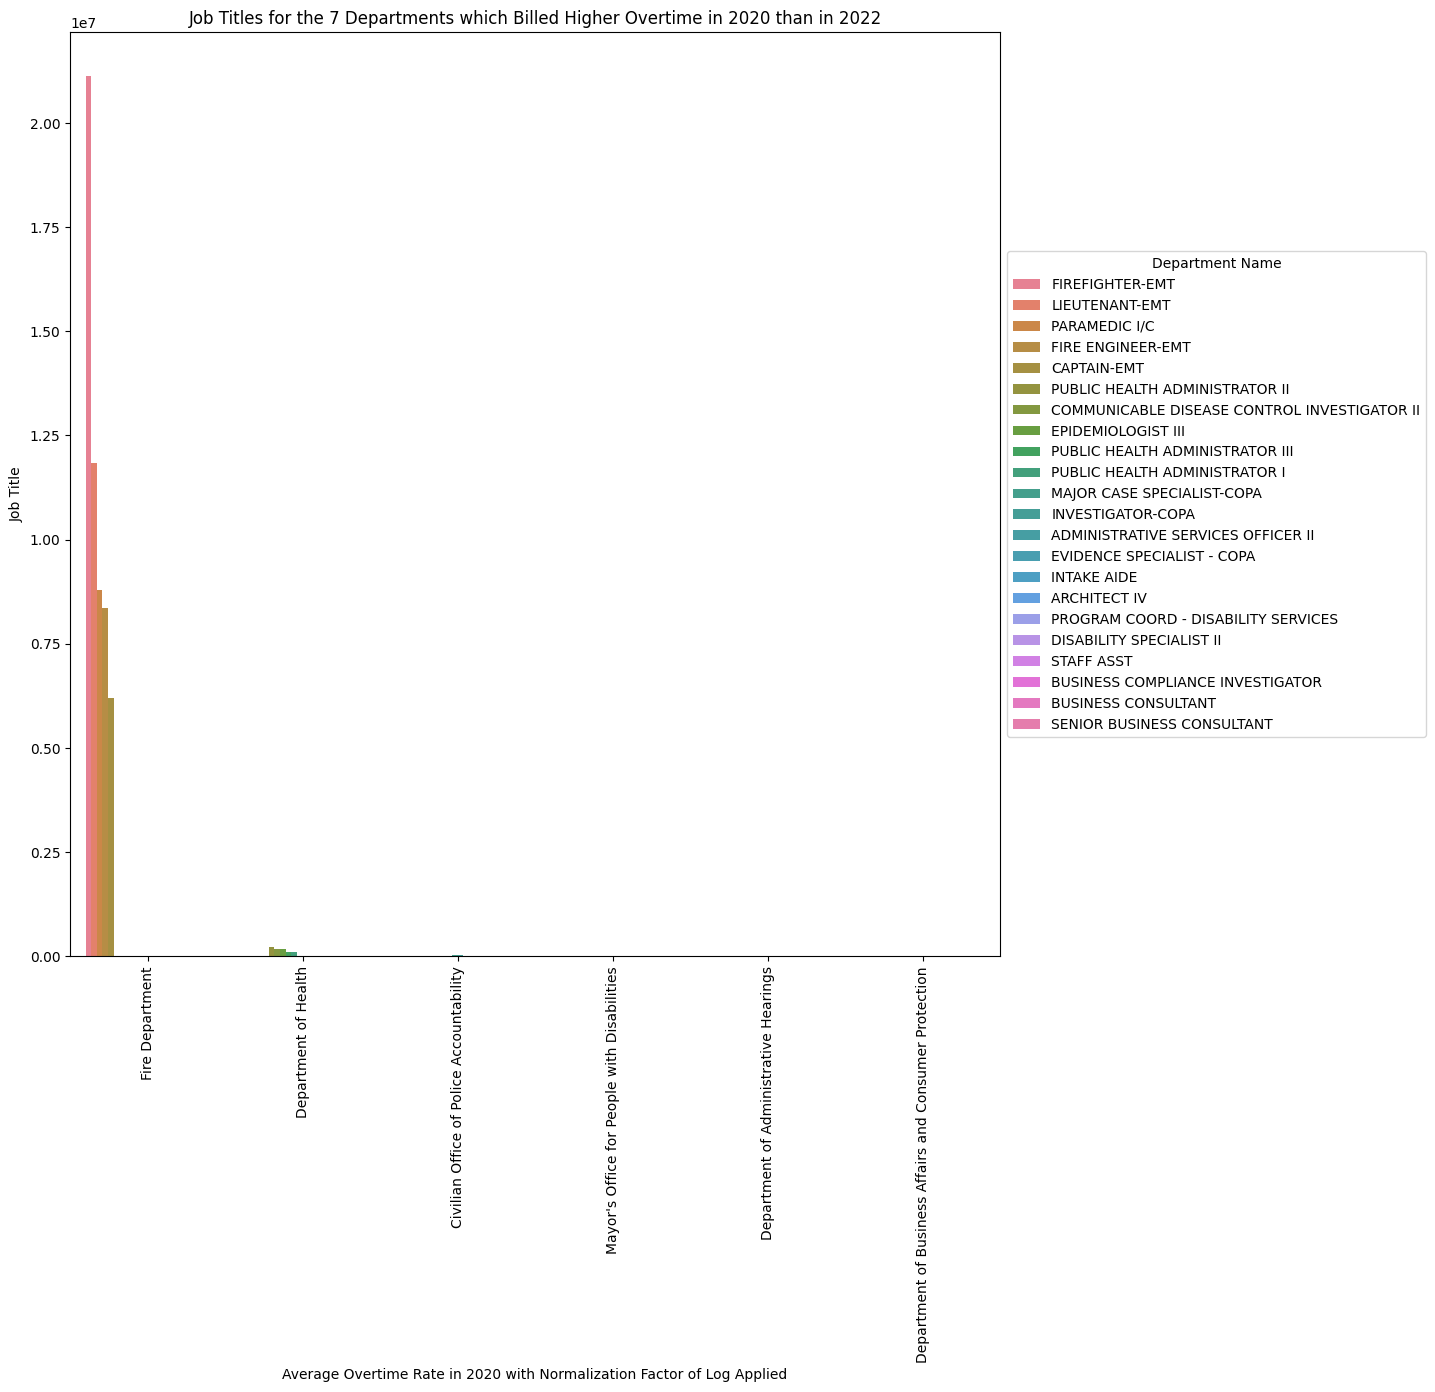

In [17]:
topFrame = [top5Fire, top5Health, top5Finance, top5Police, top5Mayor, top5Admin, top5Business]
top5Frame = pd.concat(topFrame)
#plt.xscale('log')
#print(top5Frame)
plt.figure(figsize=(12, 12))
#otPlot = sns.barplot(x='Average Rate 2020', y='TITLE', hue='Department Name' , data=top5Frame)
otPlot = sns.barplot(x='Department Name', y='Average Rate 2020', hue='TITLE', data=top5Frame)
otPlot.set(xlabel='Average Overtime Rate in 2020 with Normalization Factor of Log Applied', ylabel="Job Title", title="Job Titles for the 7 Departments which Billed Higher Overtime in 2020 than in 2022")
plt.legend(title= 'Department Name', loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=90)

#**Visualization #2: Using data from the Bureau of Labor Statistics

In [18]:
# Reading all 21 super sector data files
%cd "/content/drive/MyDrive/CS 418 - Project/Final Files"
!pwd

  #Construction
construction = pd.read_csv('AllEmployeesConstructionTotal.csv')
  # Durable Goods
durableGoods = pd.read_csv('AllEmployeesDurableGoodsTotal.csv')
  # Financial Activities
financialActivities = pd.read_csv('AllEmployeesFinancialActivitiesTotal.csv')
  # Goods Producing
goodsProducing = pd.read_csv('AllEmployeesGoodsProducingTotal.csv')
  # Government
government = pd.read_csv('AllEmployeesGovernmentTotal.csv')
  # Information
information = pd.read_csv('AllEmployeesInformationTotal.csv')
  # Leisure & Hospitality
leisureHospitality = pd.read_csv('AllEmployeesLeisure&HospitalityTotal.csv')
  # Manufacturing
manufacturing = pd.read_csv('AllEmployeesManufacturingTotal.csv')
  # Mining and Logging
miningLogging = pd.read_csv('AllEmployeesMining&LoggingTotal.csv')
  # Non Durable Goods
nonDurableGoods = pd.read_csv('AllEmployeesNonDurableGoodsTotal.csv')
  # Other Services
otherService = pd.read_csv('AllEmployeesOtherServicesTotal.csv')
  # Private Service Providing
privateServiceProv = pd.read_csv('AllEmployeesPrivateServiceProvidingTotal.csv')
  # Professional & Business Services
professionalBusinessService = pd.read_csv('AllEmployeesProfessional&BusinessServicesTotal.csv')
  # Retail Trade
retailTrade = pd.read_csv('AllEmployeesRetailTradeTotal.csv')
  # Service Providing
serviceProviding = pd.read_csv('AllEmployeesServiceProvidingTotal.csv')
  # Total Nonfarm
totalNonFarm = pd.read_csv('AllEmployeesTotalNonFarmTotal.csv')
  # Total Private
totalPrivate = pd.read_csv('AllEmployeesTotalPrivateTotal.csv')
  # Trade, Transportation, & Utilities
tradeTransportUtil = pd.read_csv('AllEmployeesTradeTransportation&UtilitiesTotal.csv')
  # Transportation & Warehousing
transportWarehouse = pd.read_csv('AllEmployeesTransportation&WarehousingTotal.csv')
  # Utilities
utilities = pd.read_csv('AllEmployeesUtilitiesTotal.csv')
  # Wholesale Trade
wholesaleTrade = pd.read_csv('AllEmployeesWholesaleTradeTotal.csv')


/content/drive/MyDrive/CS 418 - Project/Final Files
/content/drive/MyDrive/CS 418 - Project/Final Files


In [19]:
# Plot showing the 21 super sectors across the years 2019 - 2022 and their number of employees

#utilities['Year' == '2019','Jan']
#heroes[(heroes['first_season']==3) & (heroes['first_seen_on']=='a')]
utils = utilities.drop(['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], axis=1)
utils.head()

,Year,Jan,Total
0,2019,551.3,6592.0
1,2020,547.1,6514.1
2,2021,542.4,6538.6
3,2022,550.8,6707.8


In [20]:
util = utilities[(utilities['Year'] == 2019)]
util = util['Jan']
print(util)

0    551.3
Name: Jan, dtype: float64


In [ ]:

#flights_wide = utils.pivot(index="Year", columns="Month", values="Emp")
#sns.barplot(flights_wide)

#totalperYear =

sns.barplot(util, x="Month", y="Emp", hue="Year")
plt.ylim([500,580])
plt.title("Utility Employment From 2019 to 2022")
plt.ylabel("Number of Employees")



   Year     Jan     Feb     Mar     Apr     May     Jun     Jul     Aug  \
0  2019  5879.6  5885.2  5883.3  5890.1  5889.1  5880.9  5887.4  5885.9   
1  2020  5897.0  5891.7  5875.1  5484.8  5502.4  5542.0  5523.3  5539.3   
2  2021  5612.5  5621.1  5635.1  5652.4  5671.2  5697.6  5722.8  5739.9   
3  2022  5851.6  5878.3  5915.4  5946.9  5970.1  5984.5  6001.1  6019.8   

      Sep     Oct     Nov     Dec    Total  
0  5888.7  5894.4  5894.7  5898.3  70657.6  
1  5565.4  5578.6  5590.8  5600.1  67590.5  
2  5753.2  5774.2  5801.2  5829.1  68510.3  
3  6024.9  6043.9  6050.3  6063.3  71750.1  


<Axes: xlabel='Year', ylabel='Total'>

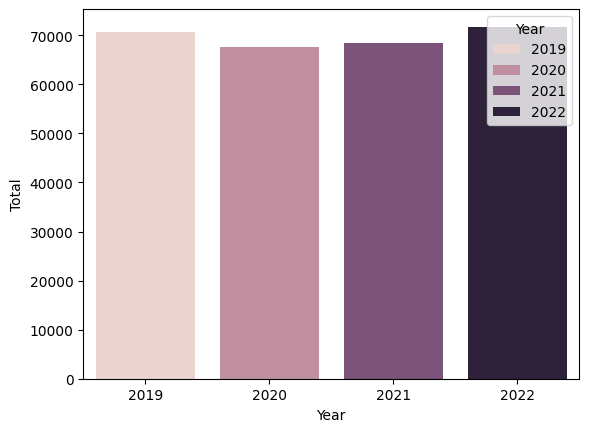

In [22]:
print(wholesaleTrade)
sns.barplot(wholesaleTrade, x="Year", y="Total", hue="Year")

In [23]:
%cd "/content/drive/MyDrive/CS 418 - Project/Final Files"
!pwd

/content/drive/MyDrive/CS 418 - Project/Final Files
/content/drive/MyDrive/CS 418 - Project/Final Files


In [24]:
## Get final files and Add another column telling the name of the supersector
construction = pd.read_csv('AllEmployeesConstructionTotal.csv')
durableGoods = pd.read_csv('AllEmployeesDurableGoodsTotal.csv')
financialActivities = pd.read_csv('AllEmployeesFinancialActivitiesTotal.csv')
goodsProducing = pd.read_csv('AllEmployeesGoodsProducingTotal.csv')
government = pd.read_csv('AllEmployeesGovernmentTotal.csv')
information = pd.read_csv('AllEmployeesInformationTotal.csv')
leisureHospitality = pd.read_csv('AllEmployeesLeisure&HospitalityTotal.csv')
manufacturing = pd.read_csv('AllEmployeesManufacturingTotal.csv')
miningLogging = pd.read_csv('AllEmployeesMining&LoggingTotal.csv')
nondurableGoods = pd.read_csv('AllEmployeesNonDurableGoodsTotal.csv')
otherServices = pd.read_csv('AllEmployeesOtherServicesTotal.csv')
privateServiceProviding = pd.read_csv('AllEmployeesPrivateServiceProvidingTotal.csv')
professionalBusinessService = pd.read_csv('AllEmployeesProfessional&BusinessServicesTotal.csv')
retailTrade = pd.read_csv('AllEmployeesRetailTradeTotal.csv')
serviceProviding = pd.read_csv('AllEmployeesServiceProvidingTotal.csv')
totalNonfarmTotal = pd.read_csv('AllEmployeesTotalNonFarmTotal.csv')
totalPrivate = pd.read_csv('AllEmployeesTotalPrivateTotal.csv')
tradeTransportationUtilities = pd.read_csv('AllEmployeesTradeTransportation&UtilitiesTotal.csv')
transportationWarehousing = pd.read_csv('AllEmployeesTransportation&WarehousingTotal.csv')
utils = pd.read_csv('AllEmployeesUtilitiesTotal.csv')
wholesale = pd.read_csv('AllEmployeesWholesaleTradeTotal.csv')


construction.loc[:,'superSector'] = pd.Series('Construction', index=construction.index)
durableGoods.loc[:,'superSector'] = pd.Series('Durable Goods', index=durableGoods.index)
financialActivities.loc[:,'superSector'] = pd.Series('Financial Activities', index=financialActivities.index)
goodsProducing.loc[:,'superSector'] = pd.Series('Goods Producing', index=goodsProducing.index)
government.loc[:,'superSector'] = pd.Series('Government', index=government.index)
information.loc[:,'superSector'] = pd.Series('Information', index=information.index)
leisureHospitality.loc[:,'superSector'] = pd.Series('Leisure & Hospitality', index=leisureHospitality.index)
manufacturing.loc[:,'superSector'] = pd.Series('Manufacturing', index=manufacturing.index)
miningLogging.loc[:,'superSector'] = pd.Series('Mining & Logging', index=miningLogging.index)
nondurableGoods.loc[:,'superSector'] = pd.Series('Nondurable Goods', index=nondurableGoods.index)
otherServices.loc[:,'superSector'] = pd.Series('Other Services', index=otherServices.index)
privateServiceProviding.loc[:,'superSector'] = pd.Series('Private Service Providng', index=privateServiceProviding.index)
professionalBusinessService.loc[:,'superSector'] = pd.Series('Professional Business Services', index=professionalBusinessService.index)
retailTrade.loc[:,'superSector'] = pd.Series('Retail Trade', index=retailTrade.index)
serviceProviding.loc[:,'superSector'] = pd.Series('Service Providing', index=serviceProviding.index)
totalNonfarmTotal.loc[:,'superSector'] = pd.Series('Total Nonfarm', index=totalNonfarmTotal.index)
totalPrivate.loc[:,'superSector'] = pd.Series('Total Private', index=totalPrivate.index)
tradeTransportationUtilities.loc[:,'superSector'] = pd.Series('Trade, Transportation, & Utilities', index=tradeTransportationUtilities.index)
transportationWarehousing.loc[:,'superSector'] = pd.Series('Transportation & Warehousing', index=transportationWarehousing.index)

utils.loc[:,'superSector'] = pd.Series('Utilities', index=utils.index)
wholesale.loc[:,'superSector'] = pd.Series('Whole Sale', index=utils.index)

print(construction)
# print(durableGoods)

   Year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov  \
0  2019  7425  7395  7425  7468  7478  7502  7526  7530  7547  7553  7541   
1  2020  7580  7615  7546  6528  7010  7156  7192  7224  7251  7300  7318   
2  2021  7363  7298  7406  7407  7395  7387  7413  7429  7475  7513  7561   
3  2022  7587  7672  7704  7704  7743  7757  7786  7798  7826  7839  7860   

    Dec  Total   superSector  
0  7527  89917  Construction  
1  7354  87074  Construction  
2  7594  89241  Construction  
3  7884  93160  Construction  


4
4
84


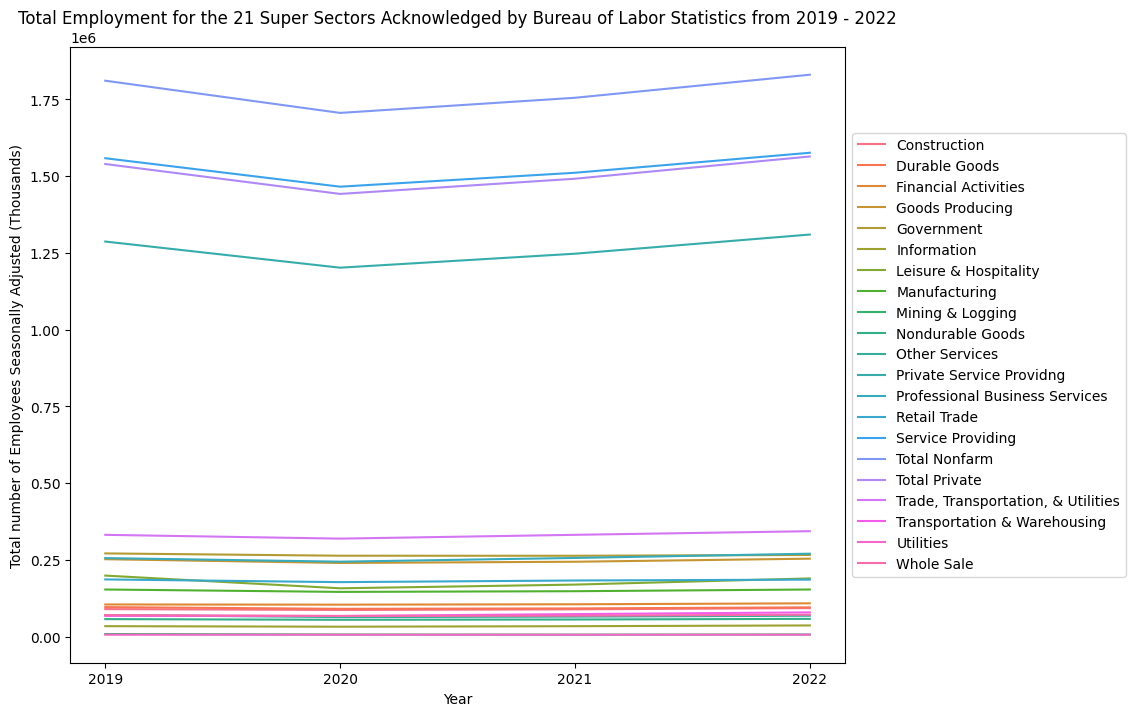

In [25]:
# Plot showing the years totals for the two different categories
plt.figure(figsize=(10, 8))
# First we concat
# for val in totalPrivate['Total']:

#   print(math.log(val))
superFrame = [construction, durableGoods, financialActivities, goodsProducing, government, information, leisureHospitality, manufacturing,
              miningLogging, nondurableGoods, otherServices, privateServiceProviding, professionalBusinessService,
              retailTrade, serviceProviding, totalNonfarmTotal, totalPrivate, tradeTransportationUtilities, transportationWarehousing, utils, wholesale]
result = pd.concat(superFrame)
result.head()

print(len(utils.axes[0]))
print(len(wholesale.axes[0]))
print(len(result.axes[0]))
result.columns
#result.plot(kind = 'line', figsize = (20,10), logy = True)

sns.lineplot(x='Year', y= 'Total', hue='superSector' , data=result)
#sns.barplot(x='Year', y='Total', hue='superSector', data=result)
plt.xticks([2019, 2020, 2021, 2022])
plt.title("Total Employment for the 21 Super Sectors Acknowledged by Bureau of Labor Statistics from 2019 - 2022")
plt.ylabel("Total number of Employees Seasonally Adjusted (Thousands)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


# In this sample we can see that Utilities remained pretty consisten during the pandemic where as wholesale trading suffered during the period of the pandemic however post
# pandemic employment started to increase back to pre pandemic levels.

In [ ]:
# The goal is to get all 21 super sectors into the graph to view which ones were the most affected and which ones remain stagnant
# Then we can look at specfic subsectors based on the super sectors that pique our interest to see exactly what subsectors were affected the most


<Figure size 1000x800 with 0 Axes>

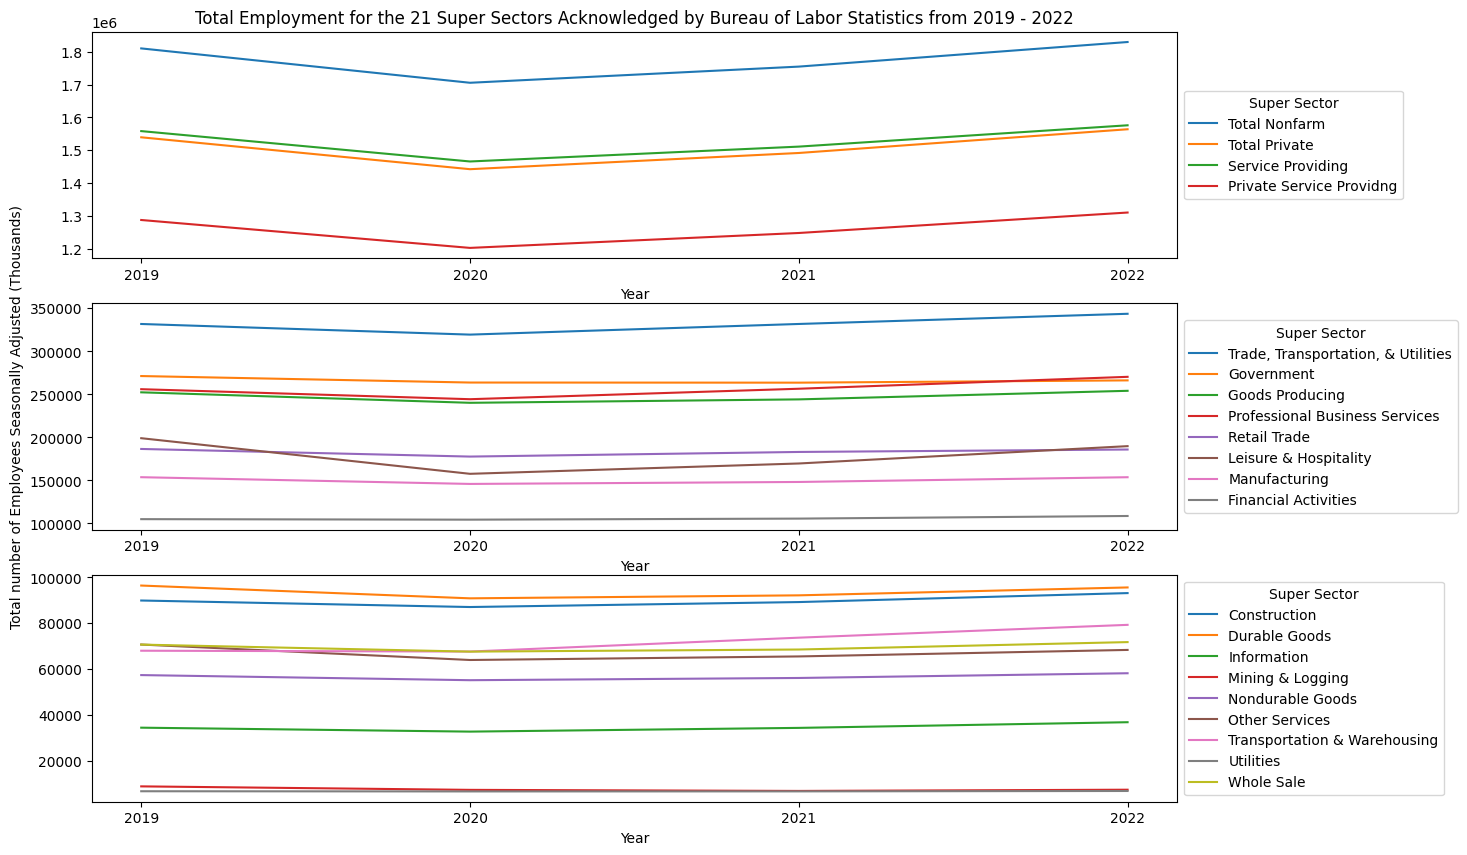

In [ ]:
# Plot showing the years totals for the two different categories
plt.figure(figsize=(10, 8))
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# totalNonfarmTotal.iloc[:,0:-1] = scaler.fit_transform(result.iloc[:,0:-1].to_numpy())
# serviceProviding.iloc[:,1:-1] = scaler.fit_transform(result.iloc[:,1:-1].to_numpy())
# totalPrivate.iloc[:,1:-1] = scaler.fit_transform(result.iloc[:,1:-1].to_numpy())
# privateServiceProviding.iloc[:,1:-1] = scaler.fit_transform(result.iloc[:,1:-1].to_numpy())

superFrame = [construction, durableGoods, financialActivities, goodsProducing, government, information, leisureHospitality, manufacturing,
              miningLogging, nondurableGoods, otherServices, privateServiceProviding, professionalBusinessService,
              retailTrade, serviceProviding, totalNonfarmTotal, totalPrivate, tradeTransportationUtilities, transportationWarehousing, utils, wholesale]
result = pd.concat(superFrame)

# result[totalNonfarmTotal].iloc[:,1:-1] = scaler.fit_transform(result[totalNonfarmTotal].iloc[:,1:-1].to_numpy())

#print(result)

subFrameUpper = [totalNonfarmTotal, totalPrivate, serviceProviding, privateServiceProviding]
subFrameMiddle = [tradeTransportationUtilities, government, goodsProducing, professionalBusinessService, retailTrade, leisureHospitality, manufacturing, financialActivities]
subFrameLower = [construction, durableGoods, information, miningLogging, nondurableGoods, otherServices, transportationWarehousing, utils, wholesale]

upperResult = pd.concat(subFrameUpper)
middleResult = pd.concat(subFrameMiddle)
lowerResult = pd.concat(subFrameLower)

fig, axs = plt.subplots(3, figsize=(14,10))
upper = sns.lineplot(x='Year', y= 'Total', hue='superSector' , data=upperResult, ax=axs[0])
middle = sns.lineplot(x='Year', y='Total', hue='superSector', data=middleResult, ax=axs[1])
lower = sns.lineplot(x='Year', y='Total', hue='superSector', data=lowerResult, ax=axs[2])
upper.set(xlabel='Year', ylabel="", xticks=[2019, 2020, 2021, 2022], title= "Total Employment for the 21 Super Sectors Acknowledged by Bureau of Labor Statistics from 2019 - 2022")
middle.set(xlabel='Year', ylabel = "Total number of Employees Seasonally Adjusted (Thousands)", xticks=[2019, 2020, 2021, 2022])
lower.set(xlabel='Year', ylabel = "")
upper.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Super Sector')
middle.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Super Sector')
lower.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Super Sector')
#sns.barplot(x='Year', y='Total', hue='superSector', data=result)

# fig.suptitle('Vertically stacked subplots')

# axs[0].plot(upperResult['Year'], upperResult['Total'])
# axs[1].plot(lowerResult['Year'], lowerResult['Total'])

plt.xticks([2019, 2020, 2021, 2022])
#plt.title("Total Employment for the 21 Super Sectors Acknowledged by Bureau of Labor Statistics from 2019 - 2022")
#plt.ylabel("Total number of Employees Seasonally Adjusted (Thousands)")
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.yscale('log')

plt.show()



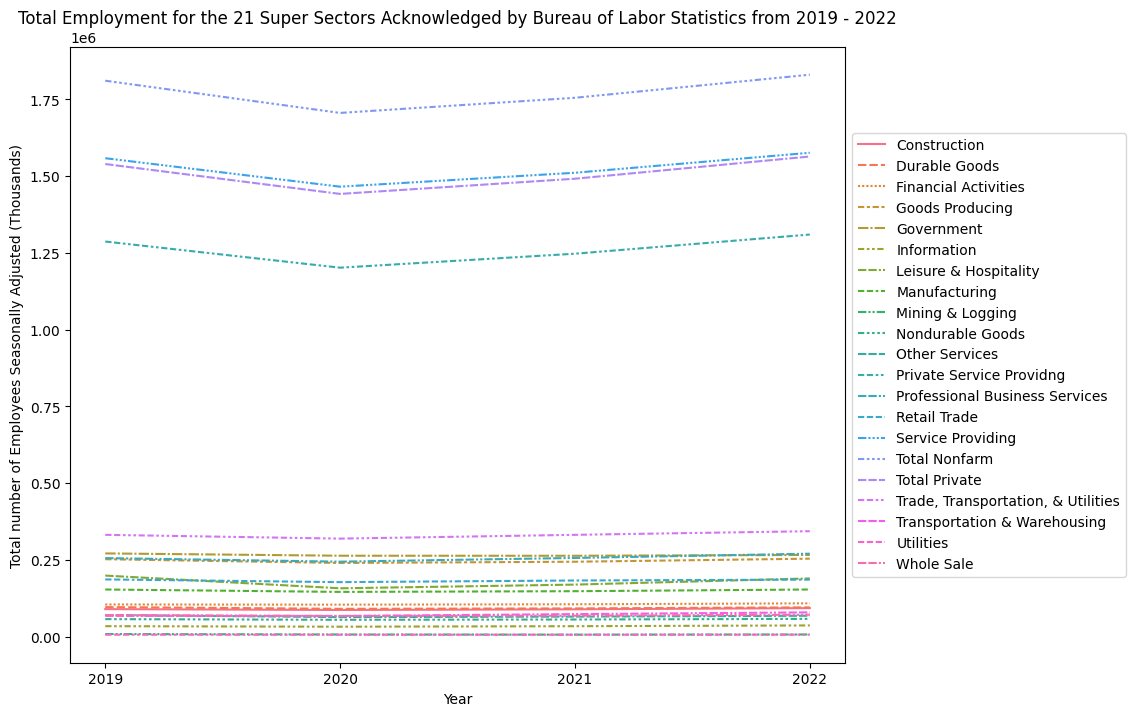

In [ ]:
# Plot showing the years totals for the two different categories
plt.figure(figsize=(10, 8))
superFrame = [construction, durableGoods, financialActivities, goodsProducing, government, information, leisureHospitality, manufacturing,
              miningLogging, nondurableGoods, otherServices, privateServiceProviding, professionalBusinessService,
              retailTrade, serviceProviding, totalNonfarmTotal, totalPrivate, tradeTransportationUtilities, transportationWarehousing, utils, wholesale]
result = pd.concat(superFrame)


sns.lineplot(x='Year', y= 'Total', hue='superSector' , data=result, style="superSector")
plt.xticks([2019, 2020, 2021, 2022])
plt.title("Total Employment for the 21 Super Sectors Acknowledged by Bureau of Labor Statistics from 2019 - 2022")
plt.ylabel("Total number of Employees Seasonally Adjusted (Thousands)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

   Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct  \
3  2022  28283  28554  28600  28606  28602  28686  28728  28758  28730  28739   

     Nov    Dec   Total                         superSector  
3  28714  28706  343706  Trade, Transportation, & Utilities  


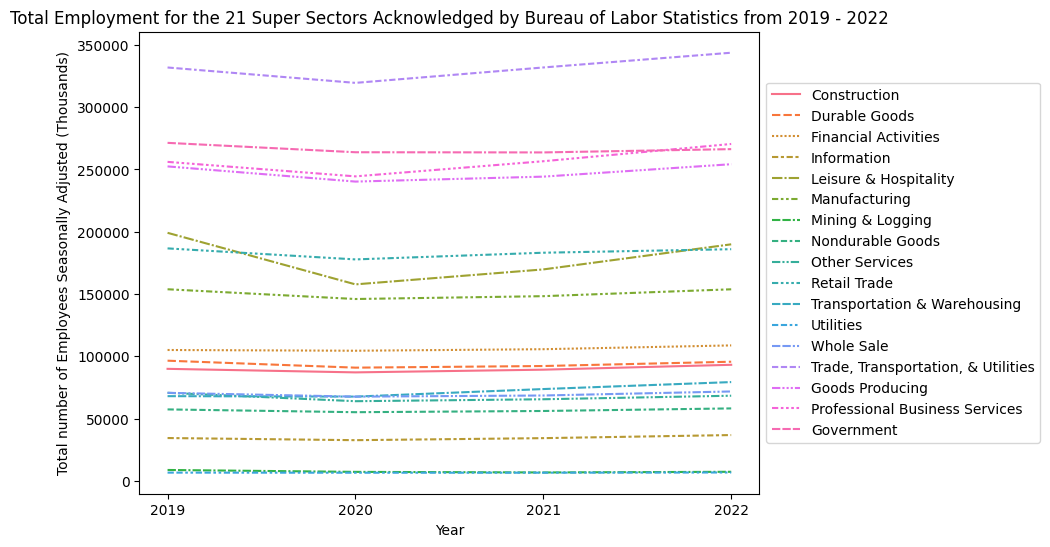

In [ ]:
# Visualization 2: Data from Bureau of Labor Statistics showing employment in all 21 supersectors from 2019 - 2022
# Plot showing the years totals for the two different categories
print(tradeTransportationUtilities[tradeTransportationUtilities['Year'] == 2022]) # 350000 is the top part of the metric

plt.figure(figsize=(8, 6))
# First we concat
superFrame = [construction, durableGoods, financialActivities, information, leisureHospitality, manufacturing,
              miningLogging, nondurableGoods, otherServices,
              retailTrade, transportationWarehousing, utils, wholesale, tradeTransportationUtilities, goodsProducing, professionalBusinessService, government]

# Removed
result = pd.concat(superFrame)
result.head()
result.columns

sns.lineplot(x='Year', y= 'Total', hue='superSector' , data=result, style="superSector")
plt.xticks([2019, 2020, 2021, 2022])
plt.title("Total Employment for the 21 Super Sectors Acknowledged by Bureau of Labor Statistics from 2019 - 2022")
plt.ylabel("Total number of Employees Seasonally Adjusted (Thousands)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# One Insight: In this sample we can see that Utilities remained pretty consisten during the pandemic where as wholesale trading suffered during the period of the pandemic however post
# pandemic employment started to increase back to pre pandemic levels.
# Government/ Retail Trade

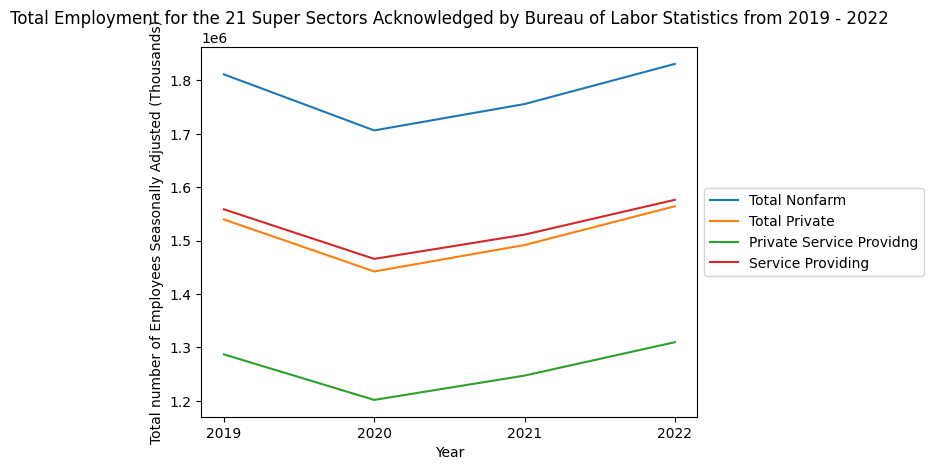

In [ ]:
resUpper = [totalNonfarmTotal, totalPrivate, privateServiceProviding, serviceProviding]
upperFrame = pd.concat(resUpper)

sns.lineplot(x='Year', y= 'Total', hue='superSector' , data=upperFrame)
plt.xticks([2019, 2020, 2021, 2022])
plt.title("Total Employment for the 21 Super Sectors Acknowledged by Bureau of Labor Statistics from 2019 - 2022")
plt.ylabel("Total number of Employees Seasonally Adjusted (Thousands)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

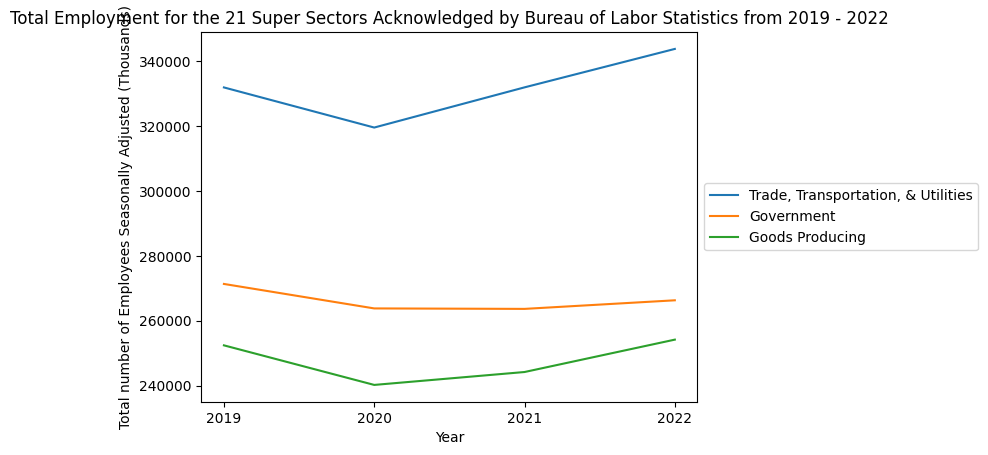

In [ ]:
resUpper = [tradeTransportationUtilities, government, goodsProducing]
upperFrame = pd.concat(resUpper)

sns.lineplot(x='Year', y= 'Total', hue='superSector' , data=upperFrame)
plt.xticks([2019, 2020, 2021, 2022])
plt.title("Total Employment for the 21 Super Sectors Acknowledged by Bureau of Labor Statistics from 2019 - 2022")
plt.ylabel("Total number of Employees Seasonally Adjusted (Thousands)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

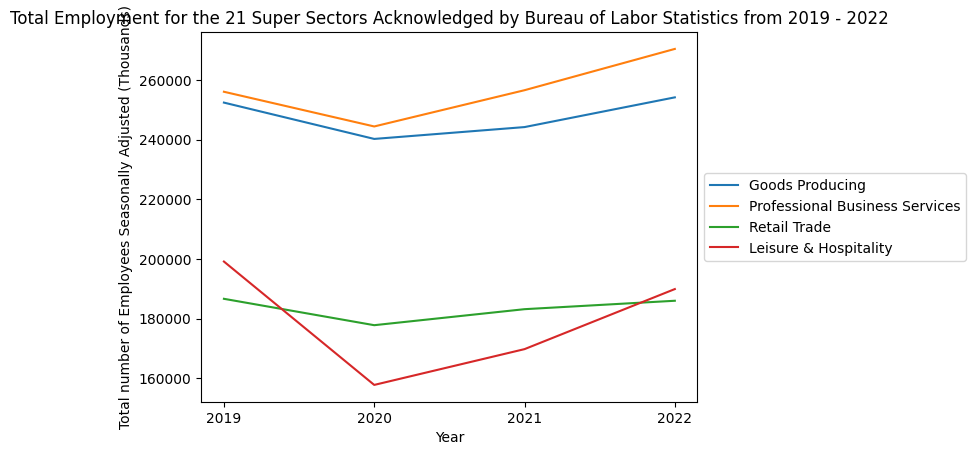

In [ ]:
resUpper = [goodsProducing, professionalBusinessService, retailTrade, leisureHospitality]
upperFrame = pd.concat(resUpper)

sns.lineplot(x='Year', y= 'Total', hue='superSector' , data=upperFrame)
plt.xticks([2019, 2020, 2021, 2022])
plt.title("Total Employment for the 21 Super Sectors Acknowledged by Bureau of Labor Statistics from 2019 - 2022")
plt.ylabel("Total number of Employees Seasonally Adjusted (Thousands)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

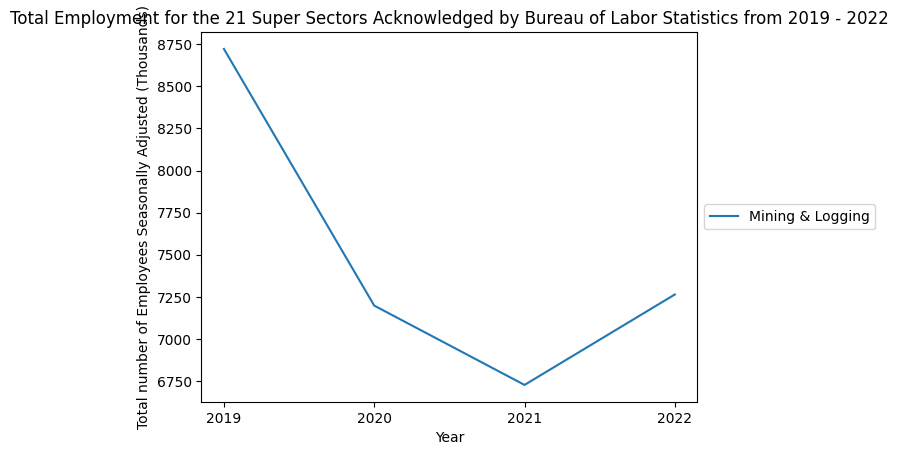

In [ ]:
resUpper = [manufacturing, financialActivities, construction, durableGoods, information]
upperFrame = pd.concat(resUpper)

sns.lineplot(x='Year', y= 'Total', hue='superSector' , data=miningLogging)
plt.xticks([2019, 2020, 2021, 2022])
plt.title("Total Employment for the 21 Super Sectors Acknowledged by Bureau of Labor Statistics from 2019 - 2022")
plt.ylabel("Total number of Employees Seasonally Adjusted (Thousands)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

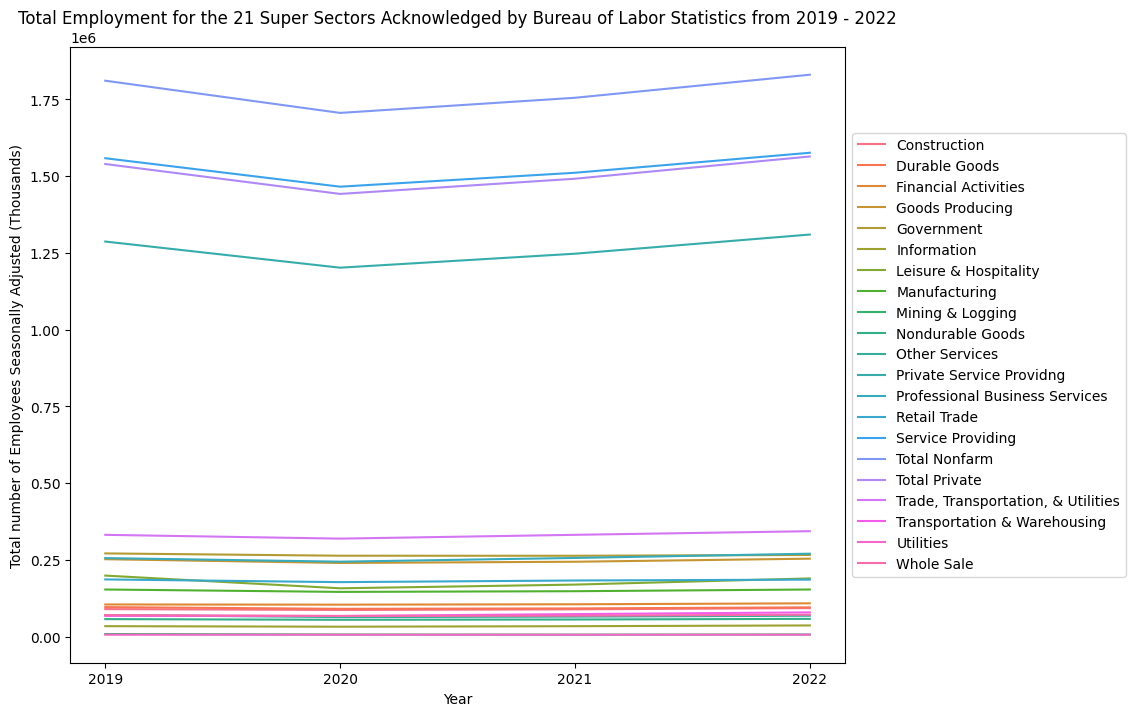

In [ ]:
# Plot showing the years totals for the two different categories
plt.figure(figsize=(10, 8))
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# totalNonfarmTotal.iloc[:,0:-1] = scaler.fit_transform(result.iloc[:,0:-1].to_numpy())
# serviceProviding.iloc[:,1:-1] = scaler.fit_transform(result.iloc[:,1:-1].to_numpy())
# totalPrivate.iloc[:,1:-1] = scaler.fit_transform(result.iloc[:,1:-1].to_numpy())
# privateServiceProviding.iloc[:,1:-1] = scaler.fit_transform(result.iloc[:,1:-1].to_numpy())

superFrame = [construction, durableGoods, financialActivities, goodsProducing, government, information, leisureHospitality, manufacturing,
              miningLogging, nondurableGoods, otherServices, privateServiceProviding, professionalBusinessService,
              retailTrade, serviceProviding, totalNonfarmTotal, totalPrivate, tradeTransportationUtilities, transportationWarehousing, utils, wholesale]
result = pd.concat(superFrame)

# result[totalNonfarmTotal].iloc[:,1:-1] = scaler.fit_transform(result[totalNonfarmTotal].iloc[:,1:-1].to_numpy())

#print(result)

sns.lineplot(x='Year', y= 'Total', hue='superSector' , data=result)
#sns.barplot(x='Year', y='Total', hue='superSector', data=result)
plt.xticks([2019, 2020, 2021, 2022])
plt.title("Total Employment for the 21 Super Sectors Acknowledged by Bureau of Labor Statistics from 2019 - 2022")
plt.ylabel("Total number of Employees Seasonally Adjusted (Thousands)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


## Extra Visualization : California state employment in subsectors similar to those found in the Chicago data analysis.

In [ ]:
calAdminSupport = pd.read_csv("AllCaliforniaAdminAndSupportServices.csv")
calAmbulatoryHealthCare = pd.read_csv("AllCaliforniaAmbulatoryHealthCareServices.csv")
calHealthCareSocialAssist = pd.read_csv("AllCaliforniaHealthCareSocialAssistance.csv")
calHealthPersonalCareRetail = pd.read_csv("AllCaliforniaHealthPersonalCareRetailers.csv")
calHospitals = pd.read_csv("AllCaliforniaHospitals.csv")
calInvestigation = pd.read_csv("AllCaliforniaInvestigationSecurityServices.csv")
calNursingResidentalCare = pd.read_csv("AllCaliforniaNursingAndResidentialCareFacilities.csv")
calPrivateEduHealthService = pd.read_csv("AllCaliforniaPrivateEducationAndHealthServices.csv")
calSocialAssit = pd.read_csv("AllCaliforniaSocialAssistance.csv")

#construction.loc[:,'superSector'] = pd.Series('Construction', index=construction.index)
calAdminSupport.loc[:, 'Subsector'] = pd.Series('Admin and Support Services', index=calAdminSupport.index)
calAmbulatoryHealthCare.loc[:, 'Subsector'] = pd.Series('Ambulatory Health Care', index=calAmbulatoryHealthCare.index)
calHealthCareSocialAssist.loc[:, 'Subsector'] = pd.Series('Health Care and Social Assitance', index=calHealthCareSocialAssist.index)
calHealthPersonalCareRetail.loc[:, 'Subsector'] = pd.Series('Health and Personal Care Retail', index=calHealthPersonalCareRetail.index)
calHospitals.loc[:, 'Subsector'] = pd.Series('Hospitals', index=calHospitals.index)
calInvestigation.loc[:, 'Subsector'] = pd.Series('Investigation', index=calInvestigation.index)
calNursingResidentalCare.loc[:, 'Subsector'] = pd.Series('Nursing and Residental Care', index=calNursingResidentalCare.index)
calPrivateEduHealthService.loc[:, 'Subsector'] = pd.Series('', index=calPrivateEduHealthService.index)
calSocialAssit.loc[:, 'Subsector'] = pd.Series('Social Assistance', index=calSocialAssit.index)
print(calAdminSupport)


   Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct  \
0  2019  410.4  414.0  415.4  412.5  417.5  419.2  420.6  426.4  426.9  428.0   
1  2020  410.5  410.9  397.7  335.3  343.2  350.2  359.0  365.6  369.6  382.1   
2  2021  383.1  392.3  391.8  393.1  394.9  389.4  396.8  400.2  403.3  421.7   
3  2022  405.4  414.7  410.6  418.1  421.6  415.2  420.3  422.4  429.8  433.3   

     Nov    Dec   Total                   Subsector  
0  430.5  424.3  5045.7  Admin and Support Services  
1  389.6  388.0  4501.7  Admin and Support Services  
2  424.6  421.3  4812.5  Admin and Support Services  
3  429.7  423.3  5044.4  Admin and Support Services  


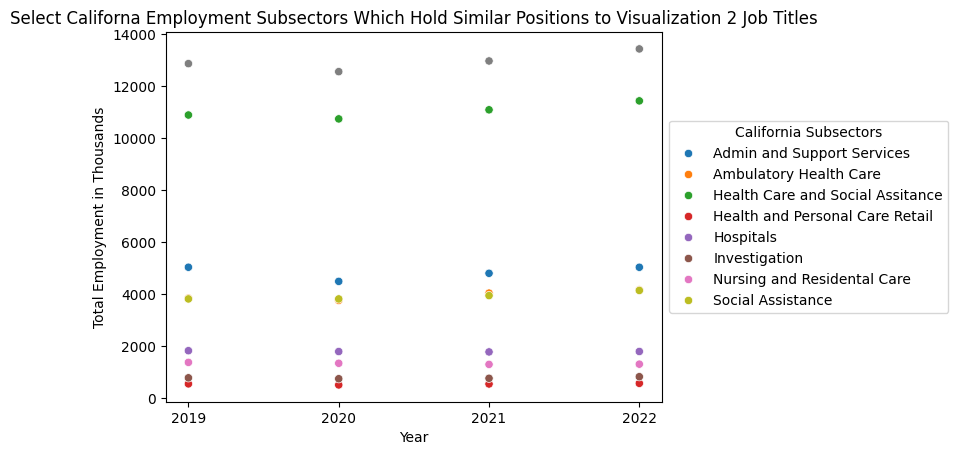

In [ ]:
californiaFrame = [calAdminSupport, calAmbulatoryHealthCare, calHealthCareSocialAssist, calHealthPersonalCareRetail, calHospitals, calInvestigation, calNursingResidentalCare,
                  calPrivateEduHealthService,calSocialAssit]

caliFrame = pd.concat(californiaFrame)


#calPlot = sns.lineplot(x='Year', y= 'Total', hue='Subsector', data=caliFrame)
calPlot = sns.scatterplot(x='Year', y= 'Total', hue='Subsector', data=caliFrame)
calPlot.set(xticks=[2019, 2020, 2021, 2022], ylabel='Total Employment in Thousands', title='Select Californa Employment Subsectors Which Hold Similar Positions to Visualization 2 Job Titles')
#plt.xticks([2019, 2020, 2021, 2022])
calPlot.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='California Subsectors')

In [ ]:
# Employment from 2019 - 2022 in the top 10 most populous US states
# States were determined based on the following link: https://www.britannica.com/topic/largest-U-S-state-by-population

# Total Nonfarm Employment in Thousands Seasonally Adjusted For Top 10 Most Populous States Between 2019 - 2022
California = pd.read_csv('StateCaliforniaEmp.csv')
Texas = pd.read_csv('StateTexasEmp.csv')
Florida = pd.read_csv('StateFloridaEmp.csv')
NewYork = pd.read_csv('StateNewYorkEmp.csv')
Penn = pd.read_csv('StatePennEmp.csv')
Illinois = pd.read_csv('StateIllinoisEmp.csv')
Ohio = pd.read_csv('StateOhioEmp.csv')
Georgia = pd.read_csv('StateGeorgiaEmp.csv')
NorthCarolina = pd.read_csv('StateNorthCaroEmp.csv')
Michigan = pd.read_csv('StateMichiganEmp.csv')


California.loc[:, 'State'] = pd.Series('California', index=California.index)
Texas.loc[:, 'State'] = pd.Series('Texas', index=Texas.index)
Florida.loc[:, 'State'] = pd.Series('Florida', index=Florida.index)
NewYork.loc[:, 'State'] = pd.Series('New York', index=NewYork.index)
Penn.loc[:, 'State'] = pd.Series('Pennsylvania', index=Penn.index)
Illinois.loc[:, 'State'] = pd.Series('Illinois', index=Illinois.index)
Ohio.loc[:, 'State'] = pd.Series('Ohio', index=Ohio.index)
Georgia.loc[:, 'State'] = pd.Series('Georgia', index=Georgia.index)
NorthCarolina.loc[:, 'State'] = pd.Series('North Carolina', index=NorthCarolina.index)
Michigan.loc[:, 'State'] = pd.Series('Michigan', index=Michigan.index)
#print(Penn)

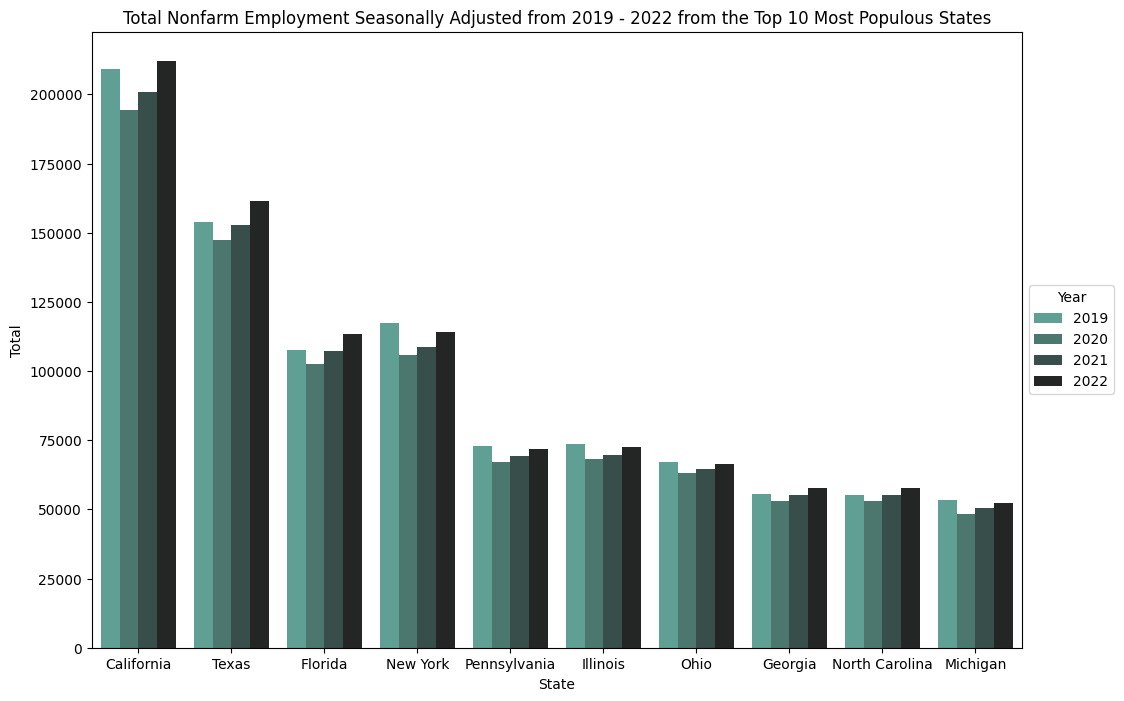

In [ ]:
# Total Nonfarm Seasonally Adjusted Employment in the Top 10 Most Populous States in the US from 2019 - 2022
plt.figure(figsize=(12, 8))
stateFrame = [California, Texas, Florida, NewYork, Penn, Illinois, Ohio, Georgia, NorthCarolina, Michigan]
# Maybe each frame should be normaized by a factor

states = pd.concat(stateFrame)
states['Year'].astype(str)
#statePlot = sns.lineplot(x='Year', y='Total', hue='State', data=states)
#sns.boxplot(data=states, x="Total", y="Year", hue="Year")
statePlot = sns.barplot(data=states, x='State', y='Total', hue='Year', palette="dark:#5A9_r")
statePlot.set(title='Total Nonfarm Employment Seasonally Adjusted from 2019 - 2022 from the Top 10 Most Populous States')
statePlot.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Year')

# ML Analysis - Predicting the Future Budget of Chicago Using Linear Regression.
# Group Member: Saahi Arumilli

In [ ]:
# RESOURCES:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html //sklearn linear regression
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
#
#
# Navigate to the files
%cd "/content/drive/MyDrive/CS 418 - Project"
!pwd

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# 2012 Budget Information for Chicago - Data Source: Chicago Data Portal
budget2012 = pd.read_csv('2012ChicagoBudget.csv')
Budget2012 = budget2012.groupby('DEPARTMENT DESCRIPTION', as_index=False).sum()
Budget2012 = Budget2012.loc[:, ['DEPARTMENT DESCRIPTION', 'TOTAL BUDGETED AMOUNT']]
Budget2012 = Budget2012.rename(columns={"TOTAL BUDGETED AMOUNT": "TOTAL BUDGET 2012"})

# 2013 Budget Information for Chicago - Data Source: Chicago Data Portal
budget2013 = pd.read_csv('2013ChicagoBudget.csv')
Budget2013 = budget2013.groupby('DEPARTMENT DESCRIPTION', as_index=False).sum()
Budget2013 = Budget2013.loc[:, ['DEPARTMENT DESCRIPTION', 'TOTAL BUDGETED AMOUNT']]
Budget2013 = Budget2013.rename(columns={"TOTAL BUDGETED AMOUNT": "TOTAL BUDGET 2013"})

# 2014 Budget Information for Chicago - Data Source: Chicago Data Portal
budget2014 = pd.read_csv('2014ChicagoBudget.csv')
Budget2014 = budget2014.groupby('DEPARTMENT DESCRIPTION', as_index=False).sum()
Budget2014 = Budget2014.loc[:, ['DEPARTMENT DESCRIPTION', 'TOTAL BUDGETED AMOUNT']]
Budget2014 = Budget2014.rename(columns={"TOTAL BUDGETED AMOUNT": "TOTAL BUDGET 2014"})

# 2015 Budget Information for Chicago - Data Source: Chicago Data Portal
budget2015 = pd.read_csv('2015ChicagoBudget.csv')
Budget2015 = budget2015.groupby('DEPARTMENT DESCRIPTION', as_index=False).sum()
Budget2015 = Budget2015.loc[:, ['DEPARTMENT DESCRIPTION', 'TOTAL BUDGETED AMOUNT']]
Budget2015 = Budget2015.rename(columns={"TOTAL BUDGETED AMOUNT": "TOTAL BUDGET 2015"})


# 2016 Budget Information for Chicago - Data Source: Chicago Data Portal
budget2016 = pd.read_csv('2016ChicagoBudget.csv')
Budget2016 = budget2016.groupby('DEPARTMENT DESCRIPTION', as_index=False).sum()
Budget2016 = Budget2016.loc[:, ['DEPARTMENT DESCRIPTION', 'TOTAL BUDGETED AMOUNT']]
Budget2016 = Budget2016.rename(columns={"TOTAL BUDGETED AMOUNT": "TOTAL BUDGET 2016"})

# 2017 Budget Information for Chicago - Data Source: Chicago Data Portal
budget2017 = pd.read_csv('2017ChicagoBudget.csv')
Budget2017 = budget2017.groupby('DEPARTMENT DESCRIPTION', as_index=False).sum()
Budget2017 = Budget2017.loc[:, ['DEPARTMENT DESCRIPTION', 'TOTAL BUDGETED AMOUNT']]
Budget2017 = Budget2017.rename(columns={"TOTAL BUDGETED AMOUNT": "TOTAL BUDGET 2017"})


# 2018 Budget Information for Chicago - Data Source: Chicago Data Portal
budget2018 = pd.read_csv('2018ChicagoBudget.csv')
Budget2018 = budget2018.groupby('DEPARTMENT DESCRIPTION', as_index=False).sum()
Budget2018 = Budget2018.loc[:, ['DEPARTMENT DESCRIPTION', 'TOTAL BUDGETED AMOUNT']]
Budget2018 = Budget2018.rename(columns={"TOTAL BUDGETED AMOUNT": "TOTAL BUDGET 2018"})


# 2019 Budget Information for Chicago - Data Source: Chicago Data Portal
budget2019 = pd.read_csv('2019ChicagoBudget.csv')
Budget2019 = budget2019.groupby('DEPARTMENT DESCRIPTION', as_index=False).sum()
Budget2019 = Budget2019.loc[:, ['DEPARTMENT DESCRIPTION','TOTAL BUDGETED AMOUNT']]
Budget2019 = Budget2019.rename(columns={"TOTAL BUDGETED AMOUNT": "TOTAL BUDGET 2019"})


# 2020 Budget Information for Chicago - Data Source: Chicago Data Portal
budget2020 = pd.read_csv('2020ChicagoBudget.csv')
Budget2020 = budget2020.groupby('DEPARTMENT DESCRIPTION', as_index=False).sum()
Budget2020 = Budget2020.loc[:, ['DEPARTMENT DESCRIPTION', 'TOTAL BUDGETED AMOUNT']]
Budget2020 = Budget2020.rename(columns={"TOTAL BUDGETED AMOUNT": "TOTAL BUDGET 2020"})


# 2021 Budget Information for Chicago - Data Source: Chicago Data Portal
budget2021 = pd.read_csv('2021ChicagoBudget.csv')
Budget2021 = budget2021.groupby('DEPARTMENT DESCRIPTION', as_index=False).sum()
Budget2021 = Budget2021.loc[:, ['DEPARTMENT DESCRIPTION', 'TOTAL BUDGETED AMOUNT']]
Budget2021 = Budget2021.rename(columns={"TOTAL BUDGETED AMOUNT": "TOTAL BUDGET 2021", "DEPARTMENT DESCRIPTION": "DEPARTMENTS"})


# 2022 Data where total budget for departments will be hidden and those values will be used to test our classifer - - Data Source: Chicago Data Portal
# budget_2022 = pd.read_csv('2022ChicagoBudget.csv')
# budget2022 = budget_2022.loc[:, ['DEPARTMENT DESCRIPTION', 'TITLE DESCRIPTION']]
# hiddenSalaries = budget_2022.loc[:, ['DEPARTMENT DESCRIPTION', 'TOTAL BUDGETED AMOUNT']]

budget2022 = pd.read_csv('2022ChicagoBudget.csv')
Budget2022 = budget2022.groupby('DEPARTMENT DESCRIPTION', as_index=False).sum()
Budget2022 = Budget2022.loc[:, ['DEPARTMENT DESCRIPTION', 'TOTAL BUDGETED AMOUNT']]
Budget2022 = Budget2022.rename(columns={"TOTAL BUDGETED AMOUNT": "TOTAL BUDGET 2022", "DEPARTMENT DESCRIPTION": "DEPARTMENTS"})


# 2023 Budget Information For Chicago - Data Source: Chicago Data Portal
budget2023 = pd.read_csv('2023ChicagoBudget.csv')
Budget2023 = budget2023.groupby('DEPARTMENT DESCRIPTION', as_index=False).sum()
Budget2023 = Budget2023.loc[:, ['DEPARTMENT DESCRIPTION', 'TOTAL BUDGETED AMOUNT']]
Budget2023 = Budget2023.rename(columns={"TOTAL BUDGETED AMOUNT": "TOTAL BUDGET 2023", "DEPARTMENT DESCRIPTION": "DEPARTMENTS"})

# print((budget2021['DEPARTMENT DESCRIPTION'].nunique())) # 36 departments are shown in this data
# print((budget2021['DEPARTMENT DESCRIPTION'].unique()))
merged_years = pd.concat([Budget2021, Budget2020, Budget2019, Budget2018], axis=1)
merged_years = merged_years.drop(['DEPARTMENT DESCRIPTION'], axis=1)

# print(merged_years)

# Use the total budgeted value for each year starting from 2018 to build a linear regression model to predict the buget for 2024 then using the existing data from 2024 figure out how accurate our model was
Budgets2015 = budget2015['TOTAL BUDGETED AMOUNT'].sum()
Budgets2014 = budget2014['TOTAL BUDGETED AMOUNT'].sum()
Budgets2013 = budget2013['TOTAL BUDGETED AMOUNT'].sum()
Budgets2012 = budget2012['TOTAL BUDGETED AMOUNT'].sum()

Budgets2017 = budget2017['TOTAL BUDGETED AMOUNT'].sum()
Budgets2016 = budget2016['TOTAL BUDGETED AMOUNT'].sum()

Budgets2018 = budget2018['TOTAL BUDGETED AMOUNT'].sum()
Budgets2019 = budget2019['TOTAL BUDGETED AMOUNT'].sum()
Budgets2020 = budget2020['TOTAL BUDGETED AMOUNT'].sum()
Budgets2021 = budget2021['TOTAL BUDGETED AMOUNT'].sum()

totalBudgetData = {'Total Budget': [Budgets2012, Budgets2013, Budgets2014, Budgets2015, Budgets2016, Budgets2017, Budgets2018, Budgets2019, Budgets2020, Budgets2021], 'Year' : [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]}
TotalBudgetFrame = pd.DataFrame(data=totalBudgetData, index=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
TotalBudgetFrame.head()

# Year is the independent variable the salary is dependant.
regression = LinearRegression().fit(TotalBudgetFrame['Year'].values.reshape(-1, 1), TotalBudgetFrame['Total Budget'])
print(regression)
regressionScore = regression.score(TotalBudgetFrame['Year'].values.reshape(-1, 1), TotalBudgetFrame['Total Budget'])
print("\nLinear Regression Coefficient Score: ", regressionScore)
print("This suggests that there is a strong positive correlation as the years keep going the overall buget to run the city is increasing")
predictedBudgetFor2022 = regression.predict(np.array([[2022]]))
predictedBudgetFor2023 = regression.predict(np.array([[2023]]))
#print(predictedBudgetFor2022, predictedBudgetFor2023)
Budgets2022 = budget2022['TOTAL BUDGETED AMOUNT'].sum()
Budgets2023 = budget2023['TOTAL BUDGETED AMOUNT'].sum()
#print(Budgets2022, Budgets2023)

print("\nFrom the below values we can see that our linear regression prediction model does under report the budget for the \npredicted years but they are only off by about a hundred million or so")
print("The Budget for 2022: ", Budgets2022, " The Predicted Budget for 2022: ", predictedBudgetFor2022[0])
print("The Budget for 2023: ", Budgets2023, " The Predicted Budget for 2023: ", predictedBudgetFor2023[0])


/content/drive/MyDrive/CS 418 - Project
/content/drive/MyDrive/CS 418 - Project
LinearRegression()

Linear Regression Coefficient Score:  0.9674431578517175
This suggests that there is a strong positive correlation as the years keep going the overall buget to run the city is increasing

From the below values we can see that our linear regression prediction model does under report the budget for the 
predicted years but they are only off by about a hundred million or so
The Budget for 2022:  3393276423.0  The Predicted Budget for 2022:  3281116314.533325
The Budget for 2023:  3522920659.0  The Predicted Budget for 2023:  3352232500.84848
